<a href="https://colab.research.google.com/github/alphchuk/alphchuk-GoogleColab/blob/main/A00228932_Alphonsus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading file
airquality = pd.read_csv("airquality.csv")

1a How many missing values are present for each variable?

In [ ]:
#checking for missing values present for each variable
airquality.isnull().sum()

Ozone      37
Solar.R     7
Wind       16
Temp        5
Month       0
Day         0
dtype: int64

1b Create a data frame of complete cases and find the mean temperature using listwise deletion

In [ ]:
#removing null
airquality_clean= df.dropna()

In [ ]:
#calculating mean 
meantemp=round(airquality_clean["Temp"].mean(),3)
print(f"The mean temperature is: {meantemp}")

The mean temperature is: 77.99


1c Find the mean temperature using pairwise deletion

In [ ]:
mean_pairwise= airquality["Temp"].mean(skipna=True)
print(f"Mean temperature using pairwise deletion : {round(mean_pairwise,2)}")

Mean temperature using pairwise deletion : 77.91


1d Which rows contain missing temperature values?

In [ ]:
# getting array of rows with missing temperature values
null_rows = airquality[airquality["Temp"].isna()==True].index.to_numpy()

null_rows



array([  8,  60,  81,  89, 145])

1e Create a box plot for the air quality data. Interpret the plot to explain why there are differences in the mean temperature.

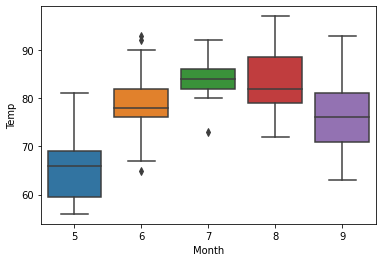

In [ ]:
#creating boxplot
sns.boxplot(x="Month",y='Temp',data=airquality)

There are differences in the means for the various months because the range of temperature values are different. In addition, months '6' and '7' have outliers

1f. How many of the ozone values are outliers (using the default 1.5 IQR setting)? What are the ozone outlier values? Create a new data frame called ozone_complete that has all rows with ozone outliers removed.

In [ ]:
Q1=airquality.Ozone.quantile(0.25)
Q1

18.0

In [ ]:
Q3=airquality.Ozone.quantile(0.75)
Q3

63.25

In [ ]:
IQR = Q3-Q1
IQR

45.25

In [ ]:
ozone_complete = airquality[~((airquality.Ozone<(Q1-1.5*IQR))|(airquality.Ozone>(Q3+1.5*IQR)))]
ozone_complete

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5,1
1,36.0,118.0,8.0,72.0,5,2
2,12.0,149.0,12.6,74.0,5,3
3,18.0,313.0,11.5,62.0,5,4
4,NaN,NaN,14.3,56.0,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9,26
149,NaN,145.0,13.2,77.0,9,27
150,14.0,191.0,14.3,75.0,9,28
151,18.0,131.0,8.0,76.0,9,29


In [ ]:
ozone_df = pd.DataFrame(ozone_complete)

In [ ]:
df_diff = df.index.difference(ozone_df.index)
df_diff

Int64Index([61, 116], dtype='int64')

In [ ]:
len(df_diff)

2

.

2a Create a new data set called air_median from the air data set. Impute the missing solar radiation values with the MEDIAN of the non-missing radiations in the air_median dataset.

In [ ]:
air_median = airquality.copy()

In [ ]:
#calculating median without missing values
air_median_clean = np.nanmedian(air_median["Solar.R"])
#this replaces NaN with median
air_median["Solar.R"]=air_median["Solar.R"].replace(np.NaN,air_median_clean) 
air_median.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     137 non-null    float64
 3   Temp     148 non-null    float64
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.3 KB


#There are 153 non-null values for 'Solar.R'

2b Create a new data set called air_mean from the air_median data set.Impute the missing temperature values with the mean temperature for the month that the temperature is missing from in the air_mean data set.For example, impute missing month 5 temperature values with the mean of the non-missing temperatures for month 5."

In [ ]:
air_mean = air_median.copy()

In [ ]:
#calculating mean without missing values
mean_temp = air_mean["Temp"].mean(skipna=True)  
air_mean.groupby("Month")["Temp"].mean()

Month
5    65.700000
6    78.965517
7    84.172414
8    83.967742
9    76.758621
Name: Temp, dtype: float64

In [ ]:
# replace NaN values with mean
air_mean["Temp"]=air_mean["Temp"].replace(np.NaN,mean_temp)
air_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     137 non-null    float64
 3   Temp     153 non-null    float64
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.3 KB


#There are now 153 non-null values for Temp meaning that all nulls have been changed